In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


file_path = r'/Users/bardiyamoghaddam/Downloads/movies.csv'


df = pd.read_csv(file_path)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#first I need to clean the data
#i wanna see how much missing data i have
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())*100
    print('{} - {}% missing data'.format(col, percent_missing))

name - 0.0% missing data
rating - 1.004173187271779% missing data
genre - 0.0% missing data
year - 0.0% missing data
released - 0.02608242044861763% missing data
score - 0.03912363067292645% missing data
votes - 0.03912363067292645% missing data
director - 0.0% missing data
writer - 0.03912363067292645% missing data
star - 0.013041210224308816% missing data
country - 0.03912363067292645% missing data
budget - 28.31246739697444% missing data
gross - 2.464788732394366% missing data
company - 0.2217005738132499% missing data
runtime - 0.05216484089723526% missing data


In [4]:
#i wanna check the data types now
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
#I need to handle Nans value before converting gross and budget to ingt by replacing with 0. Cause i got error

df['budget'].fillna(0, inplace=True)
df['gross'].fillna(0, inplace=True)

df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')

In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [7]:
df['Correctedyear'] = df['released'].str.extract('(\d{4})')

In [8]:
#if I wanna delete the column I just made I can use del
#del df['CorrectedYear']


In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correctedyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [10]:
#i wanna sort values here by gross
sorted_df=df.sort_values(by=['gross'], inplace=False, ascending=False)
sorted_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correctedyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [11]:
#if i wanna take a look at the whole dataset not only with limited showen columns, i need to set it to the system i should use this code
pd.set_option('display.max_rows', None)

In [12]:
#wanna remove duplications here. if you notice, you can see that i had to use .head() for all the df files to reduce the size of my pythonwe note, otherwise it sould be very big and hard to load. but if i remove .head()i can get the full overview of the file.
df_dup_remove=df.drop_duplicates()
df_dup_remove.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correctedyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [13]:
sorted_df2=df.sort_values(by=['company'], inplace=False, ascending=False)
sorted_df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correctedyear
7129,47 Meters Down,PG-13,Adventure,2017,"June 16, 2017 (United States)",5.7,51000.0,Johannes Roberts,Johannes Roberts,Mandy Moore,United Kingdom,5300000,62198461,thefyzz,89.0,2017
5664,Incendies,R,Drama,2010,"January 12, 2011 (France)",8.3,158000.0,Denis Villeneuve,Denis Villeneuve,Lubna Azabal,Canada,6800000,7099598,micro_scope,131.0,2011
6412,The Inevitable Defeat of Mister & Pete,R,Drama,2013,"January 25, 2013 (United States)",7.5,5300.0,George Tillman Jr.,Michael Starrbury,Skylan Brooks,United States,0,506303,iDeal Partners Film Fund,108.0,2013
4007,The Deep End,R,Crime,2001,"August 31, 2001 (United States)",6.6,11000.0,Scott McGehee,Elisabeth Sanxay Holding,Tilda Swinton,United States,3000000,10031529,i5 Films,101.0,2001
6793,Dope,R,Adventure,2015,"June 19, 2015 (United States)",7.2,82000.0,Rick Famuyiwa,Rick Famuyiwa,Shameik Moore,United States,7000000,17986781,i am OTHER,103.0,2015


In [14]:
#some company names are the same only with slight differences because they changed their names several times. so i have to make these name the same
name_replacements = {
    'Walt Disney Pictures': 'Walt Disney Productions',
    'Walt Disney Animation Studios': 'Walt Disney Productions',
    
}

df['company'] = df['company'].replace(name_replacements)

In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correctedyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


<function matplotlib.pyplot.show(close=None, block=None)>

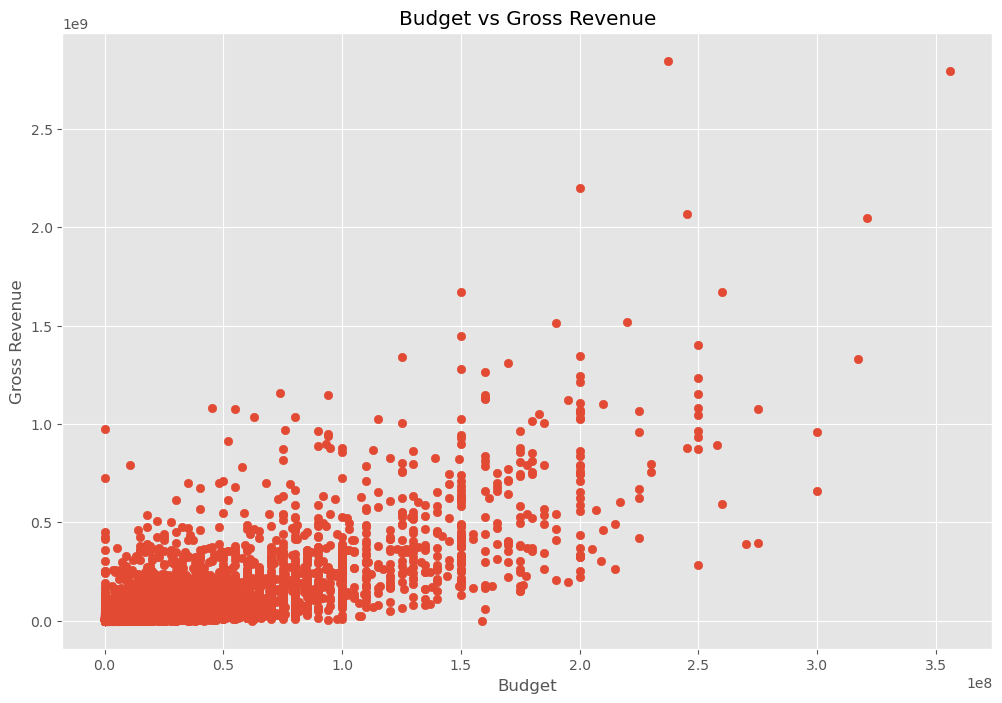

In [16]:
#now i wanna see if there is any relationship between dusget and revenue gross? and is there any relation between the company and gross?



plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show



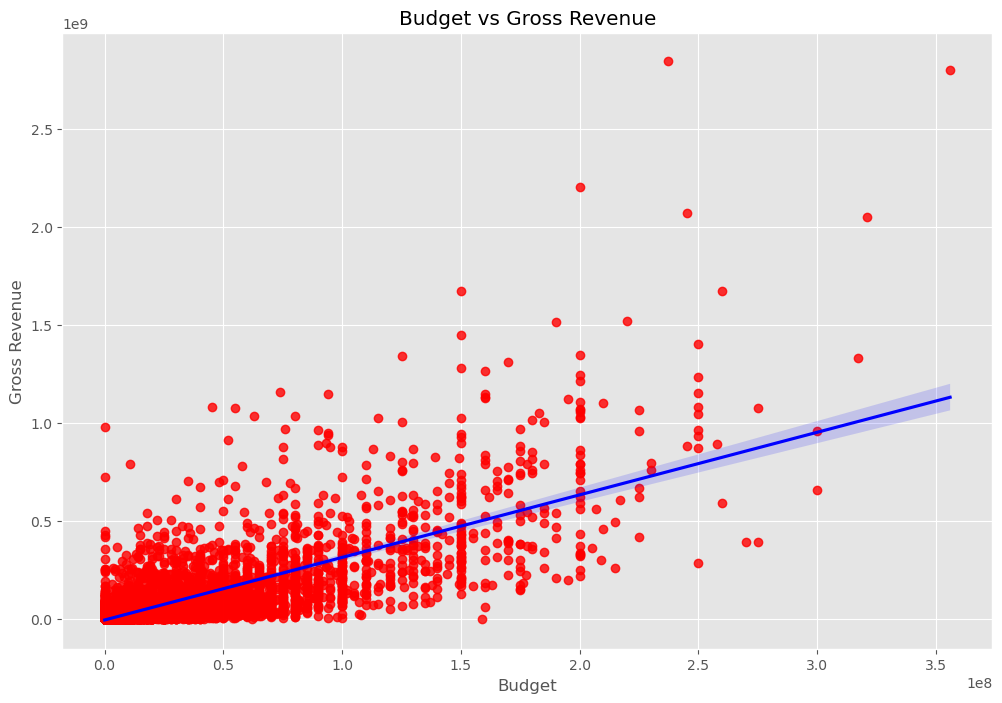

In [17]:
#i wanna do the regression plot to see because scatter plot is not helpful that much
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

In [18]:
#i wanna look at the correlation which is much easier 
correlation_budget_gross = df['budget'].corr(df['gross'])
print(correlation_budget_gross)

0.7501571968030788


In [19]:
correlation_matrix = df.corr(numeric_only=True)


print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000


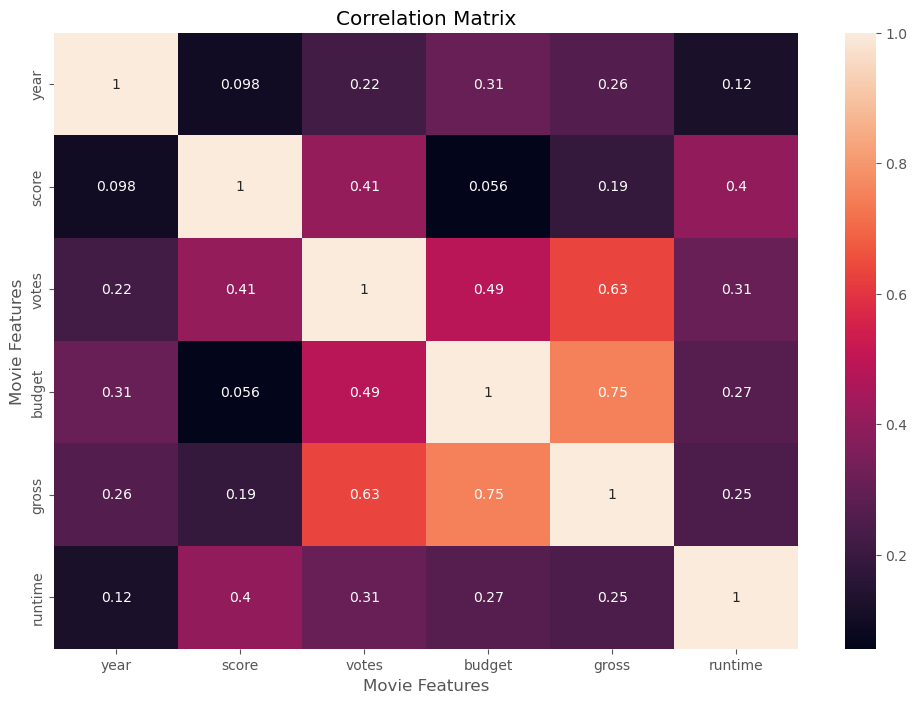

In [20]:
#budget and votes with gross have the highest correlation based on the corrrelation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [21]:
#now i wanna see the relation between the other variables and Gross. because they are not numeric, i have to make them numeric
df_nummerized=df
for col_name in df_nummerized.columns:
    if(df_nummerized[col_name].dtype=='object'):
        df_nummerized[col_name]=df_nummerized[col_name].astype('category')
        df_nummerized[col_name]=df_nummerized[col_name].cat.codes
        
correlation_matrix = df_nummerized.corr()
print(correlation_matrix['gross'].sort_values(ascending=False))

gross            1.000000
budget           0.750157
votes            0.632834
year             0.261900
Correctedyear    0.255130
runtime          0.245235
score            0.186392
company          0.156701
country          0.095325
name             0.006989
released         0.000519
star            -0.001129
director        -0.014916
writer          -0.022997
rating          -0.095450
genre           -0.234297
Name: gross, dtype: float64


In [22]:
#by look at the whole dataset i can see that instead of names for example company name has changed to number instead which shows we have done numeric correctly
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correctedyear
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2317,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0


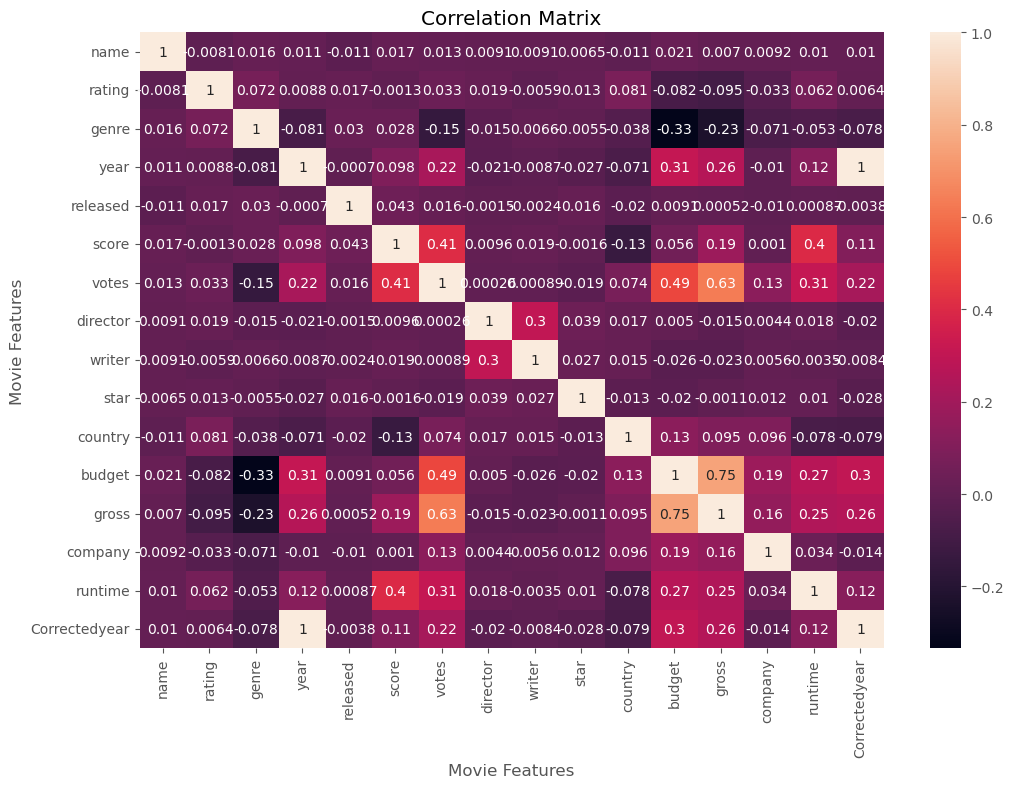

In [23]:
#now i wanna see the correlation matrix for all of the variables because all of them now are nummerized
Correlation_matrix=df_nummerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [24]:
#i couldn't identify any more sig correlation between other variables. the most important ones were budget, gross, and votes. however votes was not very sig tho. I can look at the numbers in table to read it easier too
df_nummerized.corr()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correctedyear
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.010225
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032908,0.062145,0.006403
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071037,-0.052711,-0.078210
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010448,0.120811,0.996397
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010499,0.000868,-0.003775
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001008,0.399451,0.106295
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133158,0.309212,0.218289
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004405,0.017624,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005650,-0.003511,-0.008391
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012449,0.010174,-0.027606
